In [29]:
# load pandas to deal with the data
import pandas as pd
# plotting
import matplotlib.pyplot as plt
import seaborn as sns
# create interactive plots
import plotly.express as px 
# numeric calculations
import numpy as np

In [30]:
# load data from table file where entries are separated with a space
data = pd.read_table("../data/flickr_data2.csv", sep=",")
# show first 5 rows of the dataframe
data.head()


C:\Users\elieh\AppData\Local\Temp\ipykernel_8884\3779317642.py:2: DtypeWarning: Columns (11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_table("../data/flickr_data2.csv", sep=",")


,id,user,lat,long,tags,title,date_taken_minute,date_taken_hour,date_taken_day,date_taken_month,date_taken_year,date_upload_minute,date_upload_hour,date_upload_day,date_upload_month,date_upload_year,Unnamed: 16,Unnamed: 17,Unnamed: 18
0,4395181099,30624617@N03,45.754858,4.821710,"chair,lyon,rhône,chaise,rhônealpes",Chaises avec vue,11.0,15,28,2,2010,23,20,28.0,2,2010.0,NaN,NaN,NaN
1,4394748717,35853470@N00,45.753270,4.862953,NaN,NaN,51.0,17,28,2,2010,52,17,28.0,2,2010.0,NaN,NaN,NaN
2,4394694699,11817998@N05,45.760655,4.846564,"365,iphone",59/365 - R46 V103 B163,29.0,17,28,2,2010,33,17,28.0,2,2010.0,NaN,NaN,NaN
3,4394803790,11545749@N06,45.784000,4.874072,"nin,nineinchnails,gift,screening,toiou,avott",2010-01-29 Toiou Avott Lyon,15.0,20,28,1,2010,38,12,28.0,2,2010.0,NaN,NaN,NaN
4,4394803554,11545749@N06,45.784000,4.874072,"lyon,nin,nineinchnails,gift,screening,toiou,avott",2010-01-28 Toiou Avott Lyon,10.0,20,28,1,2010,38,12,28.0,2,2010.0,NaN,NaN,NaN


In [31]:
data.info()
len(data)
data[data["Unnamed: 16"].notna()]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420240 entries, 0 to 420239
Data columns (total 19 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  420240 non-null  int64  
 1   user                420240 non-null  object 
 2   lat                 420240 non-null  float64
 3   long                420240 non-null  float64
 4   tags                316730 non-null  object 
 5   title               381911 non-null  object 
 6   date_taken_minute   420239 non-null  float64
 7   date_taken_hour     420240 non-null  int64  
 8   date_taken_day      420240 non-null  int64  
 9   date_taken_month    420240 non-null  int64  
 10  date_taken_year     420240 non-null  int64  
 11  date_upload_minute  420228 non-null  object 
 12  date_upload_hour    420238 non-null  object 
 13  date_upload_day     420238 non-null  float64
 14  date_upload_month   420240 non-null  int64  
 15  date_upload_year    420239 non-nul

,id,user,lat,long,tags,title,date_taken_minute,date_taken_hour,date_taken_day,date_taken_month,date_taken_year,date_upload_minute,date_upload_hour,date_upload_day,date_upload_month,date_upload_year,Unnamed: 16,Unnamed: 17,Unnamed: 18
85950,6674970791,29713277@N02,45.753948,4.788145,"portrait,throughtheleaves,autraversdesfeuillages",NaN,2012.0,29,12,10,9,NaN,47,21.0,10,1.0,2011.0,NaN,NaN
90872,6674970791,29713277@N02,45.753948,4.788145,"portrait,throughtheleaves,autraversdesfeuillages",NaN,2012.0,29,12,10,9,NaN,47,21.0,10,1.0,2011.0,NaN,NaN
98808,7386785280,37290448@N04,45.771315,4.835829,"city,plants,plant,france,brick,green,stone,wal...",Plant,2012.0,17,9,6,6,Stone,32,17.0,17,6.0,2012.0,NaN,NaN
98816,7387000024,38586649@N00,45.779196,4.853596,"uploaded:by=flicksquare,foursquare:venue=4b851...",Beautiful weather in #Lyon,2012.0,46,11,17,6,),46,17.0,17,6.0,2012.0,NaN,NaN
102366,7583546064,37290448@N04,45.772827,4.841065,"city,blackandwhite,france,water,river,french,c...",Bridge,2012.0,38,11,7,6,Rhône,5,18.0,16,7.0,2012.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390775,33105832478,53987060@N02,45.771063,4.829993,NaN,Looking from the Roman arenas to the Basilica ...,2019.0,57,11,16,11,-),45,13.0,4,2.0,2018.0,NaN,NaN
391474,31807499637,53987060@N02,45.762097,4.821281,NaN,Inside the Basilica of Notre-Dame de Fourvière...,2019.0,55,12,15,11,-),25,8.0,15,1.0,2018.0,NaN,NaN
391596,31807499637,53987060@N02,45.762097,4.821281,NaN,Inside the Basilica of Notre-Dame de Fourvière...,2019.0,55,12,15,11,-),25,8.0,15,1.0,2018.0,NaN,NaN
395508,47103124882,15917364@N02,45.776985,4.833829,"lyon,rhône,croixrousse,escaliers,rue,personne,...",Lyon - En solitaire à la Croix-Rousse,2019.0,54,17,18,2,NaN,29,12.0,20,2.0,2019.0,NaN,NaN


In [32]:
data_cleaned = data.copy()
data_cleaned = data_cleaned.drop(columns=["Unnamed: 16", "Unnamed: 17", "Unnamed: 18"])
data_cleaned.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420240 entries, 0 to 420239
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  420240 non-null  int64  
 1   user                420240 non-null  object 
 2   lat                 420240 non-null  float64
 3   long                420240 non-null  float64
 4   tags                316730 non-null  object 
 5   title               381911 non-null  object 
 6   date_taken_minute   420239 non-null  float64
 7   date_taken_hour     420240 non-null  int64  
 8   date_taken_day      420240 non-null  int64  
 9   date_taken_month    420240 non-null  int64  
 10  date_taken_year     420240 non-null  int64  
 11  date_upload_minute  420228 non-null  object 
 12  date_upload_hour    420238 non-null  object 
 13  date_upload_day     420238 non-null  float64
 14  date_upload_month   420240 non-null  int64  
 15  date_upload_year    420239 non-nul

In [ ]:
subset_cols = [
    "id",
    "user",
    "lat",
    "long",
    "date_taken_minute",
    "date_taken_hour",
    "date_taken_day",
    "date_taken_month",
    "date_taken_year",
    "date_upload_minute",
    "date_upload_hour",
    "date_upload_day",
    "date_upload_month",
    "date_upload_year"
]

data_cleaned = data_cleaned.dropna(subset=subset_cols)

data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 301977 entries, 0 to 420239
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  301977 non-null  int64  
 1   user                301977 non-null  object 
 2   lat                 301977 non-null  float64
 3   long                301977 non-null  float64
 4   tags                301977 non-null  object 
 5   title               301977 non-null  object 
 6   date_taken_minute   301977 non-null  float64
 7   date_taken_hour     301977 non-null  int64  
 8   date_taken_day      301977 non-null  int64  
 9   date_taken_month    301977 non-null  int64  
 10  date_taken_year     301977 non-null  int64  
 11  date_upload_minute  301977 non-null  object 
 12  date_upload_hour    301977 non-null  object 
 13  date_upload_day     301977 non-null  float64
 14  date_upload_month   301977 non-null  int64  
 15  date_upload_year    301977 non-null  fl

In [34]:
cols_date = [
    "date_taken_minute",
    "date_taken_hour",
    "date_taken_day",
    "date_taken_month",
    "date_taken_year",
    "date_upload_minute",
    "date_upload_hour",
    "date_upload_day",
    "date_upload_month",
    "date_upload_year",
]

for topic in cols_date:
    converted = pd.to_numeric(data_cleaned[topic], errors="coerce")

    data_cleaned = data_cleaned.drop(
        data[converted.isna() & data[topic].notna()].index
    )

    data_cleaned[topic] = pd.to_numeric(
        data_cleaned[topic], errors="raise"
    )



data_cleaned.info()
data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 301897 entries, 0 to 420239
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  301897 non-null  int64  
 1   user                301897 non-null  object 
 2   lat                 301897 non-null  float64
 3   long                301897 non-null  float64
 4   tags                301897 non-null  object 
 5   title               301897 non-null  object 
 6   date_taken_minute   301897 non-null  float64
 7   date_taken_hour     301897 non-null  int64  
 8   date_taken_day      301897 non-null  int64  
 9   date_taken_month    301897 non-null  int64  
 10  date_taken_year     301897 non-null  int64  
 11  date_upload_minute  301897 non-null  float64
 12  date_upload_hour    301897 non-null  int64  
 13  date_upload_day     301897 non-null  float64
 14  date_upload_month   301897 non-null  int64  
 15  date_upload_year    301897 non-null  fl

In [35]:
print(len(data_cleaned[ (data_cleaned['lat'] < 45.60) | (data_cleaned['lat'] > 45.90)]))
print(len(data_cleaned[ (data_cleaned['long'] < 4.60) | (data_cleaned['long'] > 5.0)]))

data_cleaned = data_cleaned.drop(
    data_cleaned[
        (data_cleaned['lat'] < 45.60) | (data_cleaned['lat'] > 45.90) |
        (data_cleaned['long'] < 4.60) | (data_cleaned['long'] > 5.00)
    ].index
)

data_cleaned.info()


0
149
<class 'pandas.core.frame.DataFrame'>
Index: 301748 entries, 0 to 420239
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  301748 non-null  int64  
 1   user                301748 non-null  object 
 2   lat                 301748 non-null  float64
 3   long                301748 non-null  float64
 4   tags                301748 non-null  object 
 5   title               301748 non-null  object 
 6   date_taken_minute   301748 non-null  float64
 7   date_taken_hour     301748 non-null  int64  
 8   date_taken_day      301748 non-null  int64  
 9   date_taken_month    301748 non-null  int64  
 10  date_taken_year     301748 non-null  int64  
 11  date_upload_minute  301748 non-null  float64
 12  date_upload_hour    301748 non-null  int64  
 13  date_upload_day     301748 non-null  float64
 14  date_upload_month   301748 non-null  int64  
 15  date_upload_year    301748 non-nu

In [36]:
# Nombre total de lignes et colonnes
print("\nNombre total de lignes et colonnes :")
print(f"Lignes : {data_cleaned.shape[0]}, Colonnes : {data_cleaned.shape[1]}")

subset = [
    "lat",
    "long",
    "date_taken_year",
    "date_taken_month",
    "date_taken_day",
    "date_taken_hour",
    "date_taken_minute"
]

print("\nNombre de doublons")
print(data_cleaned.duplicated().sum())


print("Détection des doublons\n")
# Nombre de doublons
nb_doublons = data_cleaned.duplicated().sum()
print(f"Nombre de doublons exacts trouvés : {nb_doublons}")

# Afficher les lignes dupliquées
doublons_mask = data_cleaned.duplicated(keep=False)  # Marque toutes les occurrences
lignes_dupliquees = data_cleaned[doublons_mask].sort_values(by=list(data_cleaned.columns))

print(f"\nAperçu des {min(20, len(lignes_dupliquees))} premières lignes dupliquées :")
lignes_dupliquees.head(20)




# Éliminer les doublons
data_cleaned_duplicates = data_cleaned.drop_duplicates()
print(f"Dataset avant : {data_cleaned.shape[0]} lignes")
print(f"Dataset après : {data_cleaned_duplicates.shape[0]} lignes")
print(f"{data_cleaned.shape[0] - data_cleaned_duplicates.shape[0]} doublons supprimés")


Nombre total de lignes et colonnes :
Lignes : 301748, Colonnes : 16

Nombre de doublons
181377
Détection des doublons

Nombre de doublons exacts trouvés : 181377

Aperçu des 20 premières lignes dupliquées :
Dataset avant : 301748 lignes
Dataset après : 120371 lignes
181377 doublons supprimés


In [ ]:
print("\nNombre total de lignes et colonnes :")
print(f"Lignes : {data_cleaned.shape[0]}, Colonnes : {data_cleaned.shape[1]}")


doublons_mask = data_cleaned.duplicated(subset=
["user","lat","long","date_taken_year","date_taken_month","date_taken_day","date_taken_hour","date_taken_minute"]
                                        ,keep=False)



print("Détection des doublons\n")
# Nombre de doublons
nb_doublons = doublons_mask.sum()
print(f"Nombre de doublons exacts trouvés : {nb_doublons}")

nb_groupes = (
    data_cleaned[doublons_mask]
    .groupby([
        "user","lat","long",
        "date_taken_year","date_taken_month","date_taken_day",
        "date_taken_hour","date_taken_minute"
    ])
    .ngroups
)

print(f"Nombre de groupes de doublons : {nb_groupes}")

# Afficher les lignes dupliquées
lignes_dupliquees = data_cleaned[doublons_mask].sort_values(by=list(data_cleaned.columns))

print(f"\nAperçu des {min(20, len(lignes_dupliquees))} premières lignes dupliquées :")
lignes_dupliquees.head(20)




#Éliminer les doublons
data_cleaned = (
    data_cleaned
    .sort_values("date_taken_hour")
    .drop_duplicates(
        subset=[
            "user",
            "lat",
            "long",
            "date_taken_year",
            "date_taken_month",
            "date_taken_day",
            "date_taken_hour",
            "date_taken_minute"
        ],
        keep="last"
    )
)
print(f"Dataset avant : {data_cleaned.shape[0]} lignes")
print(f"Dataset après : {data_cleaned.shape[0]} lignes")
print(f"{data_cleaned.shape[0] - data_cleaned.shape[0]} doublons supprimés")


Nombre total de lignes et colonnes :
Lignes : 301748, Colonnes : 16
Détection des doublons

Nombre de doublons exacts trouvés : 295729
Nombre de groupes de doublons : 89168

Aperçu des 20 premières lignes dupliquées :
Dataset avant : 54998 lignes
Dataset après : 54998 lignes
0 doublons supprimés


In [38]:
print(len(data_cleaned[(data_cleaned["date_taken_minute"] > 60) | (data_cleaned["date_taken_minute"] < 0)]))
print(len(data_cleaned[(data_cleaned["date_taken_hour"] > 24) | (data_cleaned["date_taken_hour"] < 0)]))
print(len(data_cleaned[(data_cleaned["date_taken_day"] > 366) | (data_cleaned["date_taken_day"] < 0)]))
print(len(data_cleaned[(data_cleaned["date_taken_month"] > 12) | (data_cleaned["date_taken_month"] < 0)]))
print(len(data_cleaned[(data_cleaned["date_taken_year"] > 2025) | (data_cleaned["date_taken_year"] < 0)]))


print(len(data_cleaned[(data_cleaned["date_upload_minute"] > 60) | (data_cleaned["date_upload_minute"] < 0)]))
print(len(data_cleaned[(data_cleaned["date_upload_hour"] > 24) | (data_cleaned["date_upload_hour"] < 0)]))
print(len(data_cleaned[(data_cleaned["date_upload_day"] > 366) | (data_cleaned["date_upload_day"] < 0)]))
print(len(data_cleaned[(data_cleaned["date_upload_month"] > 12) | (data_cleaned["date_upload_month"] < 0)]))
print(len(data_cleaned[(data_cleaned["date_upload_year"] > 2025) | (data_cleaned["date_upload_year"] < 0)]))

0
0
0
0
0
0
0
0
0
0


**Clustering**

In [39]:
data_cleaned.describe()

,id,lat,long,date_taken_minute,date_taken_hour,date_taken_day,date_taken_month,date_taken_year,date_upload_minute,date_upload_hour,date_upload_day,date_upload_month,date_upload_year
count,5.499800e+04,54998.000000,54998.000000,54998.000000,54998.000000,54998.000000,54998.000000,54998.000000,54998.000000,54998.000000,54998.000000,54998.000000,54998.000000
mean,1.927077e+10,45.764978,4.835537,28.510473,14.660679,15.271355,7.035547,2013.898705,29.676552,14.788647,15.523328,6.804084,2014.263628
std,1.351650e+10,0.019923,0.022379,17.491844,4.971021,8.751663,3.443452,3.211529,17.324770,6.681975,8.626202,3.550308,2.733965
min,3.066675e+08,45.655641,4.720312,0.000000,0.000000,1.000000,1.000000,1926.000000,0.000000,0.000000,1.000000,1.000000,2009.000000
25%,7.765973e+09,45.758181,4.826361,13.000000,12.000000,8.000000,4.000000,2012.000000,15.000000,11.000000,8.000000,4.000000,2012.000000
50%,1.476678e+10,45.762886,4.832174,28.000000,15.000000,15.000000,7.000000,2014.000000,30.000000,16.000000,15.000000,7.000000,2014.000000
75%,2.983098e+10,45.770319,4.838878,44.000000,18.000000,23.000000,10.000000,2016.000000,45.000000,20.000000,23.000000,10.000000,2017.000000
max,4.914809e+10,45.854950,5.000000,59.000000,23.000000,31.000000,12.000000,2019.000000,59.000000,23.000000,31.000000,12.000000,2019.000000


In [40]:
data_cleaned.describe(include='all')


,id,user,lat,long,tags,title,date_taken_minute,date_taken_hour,date_taken_day,date_taken_month,date_taken_year,date_upload_minute,date_upload_hour,date_upload_day,date_upload_month,date_upload_year
count,5.499800e+04,54998,54998.000000,54998.000000,54998,54998,54998.000000,54998.000000,54998.000000,54998.000000,54998.000000,54998.000000,54998.000000,54998.000000,54998.000000,54998.000000
unique,NaN,3725,NaN,NaN,30086,38055,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,90493526@N00,NaN,NaN,lyon,Lyon,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,3600,NaN,NaN,957,1308,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1.927077e+10,NaN,45.764978,4.835537,NaN,NaN,28.510473,14.660679,15.271355,7.035547,2013.898705,29.676552,14.788647,15.523328,6.804084,2014.263628
std,1.351650e+10,NaN,0.019923,0.022379,NaN,NaN,17.491844,4.971021,8.751663,3.443452,3.211529,17.324770,6.681975,8.626202,3.550308,2.733965
min,3.066675e+08,NaN,45.655641,4.720312,NaN,NaN,0.000000,0.000000,1.000000,1.000000,1926.000000,0.000000,0.000000,1.000000,1.000000,2009.000000
25%,7.765973e+09,NaN,45.758181,4.826361,NaN,NaN,13.000000,12.000000,8.000000,4.000000,2012.000000,15.000000,11.000000,8.000000,4.000000,2012.000000
50%,1.476678e+10,NaN,45.762886,4.832174,NaN,NaN,28.000000,15.000000,15.000000,7.000000,2014.000000,30.000000,16.000000,15.000000,7.000000,2014.000000
75%,2.983098e+10,NaN,45.770319,4.838878,NaN,NaN,44.000000,18.000000,23.000000,10.000000,2016.000000,45.000000,20.000000,23.000000,10.000000,2017.000000


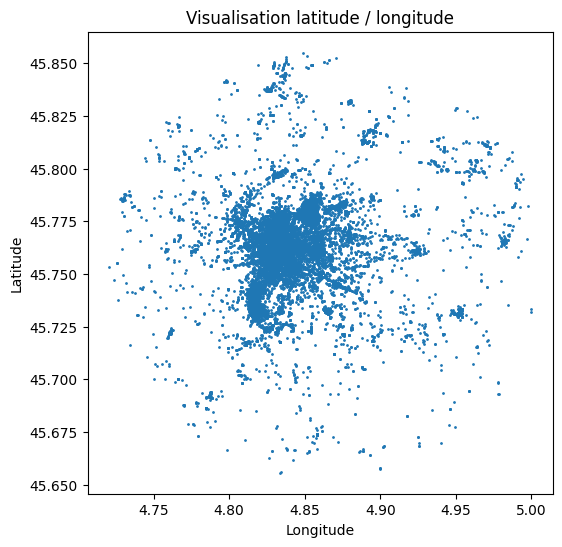

In [41]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
plt.scatter(data_cleaned["long"], data_cleaned["lat"], s=1)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Visualisation latitude / longitude")
plt.show()

In [42]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


# 1. Sélection des variables
X = data_cleaned[["lat", "long"]]

# 2. Normalisation
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)




data = [] 
for k in range(1,10):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=1000)
    # fit scaled data
    kmeans.fit(X_scaled)
    inertia = kmeans.inertia_
    data.append((k,inertia))

inertia_df = pd.DataFrame(data, columns=["k", "inertia"])
inertia_df

,k,inertia
0,1,109996.000000
1,2,79588.327369
2,3,54995.576094
3,4,40640.173624
4,5,29513.748880
5,6,26881.694506
6,7,23556.755407
7,8,19277.879994
8,9,17637.053191


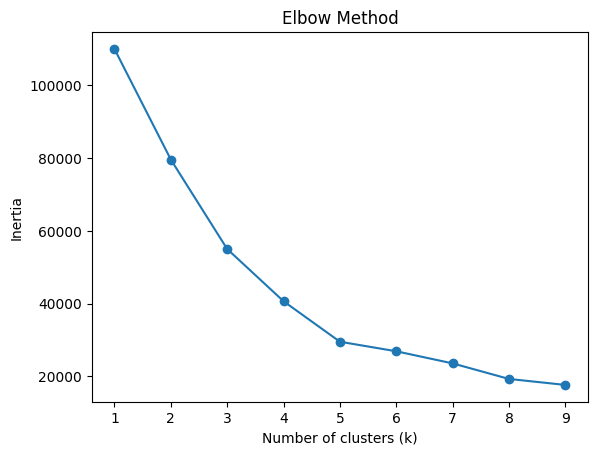

In [43]:
plt.plot(inertia_df["k"], inertia_df["inertia"], marker='o')
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()


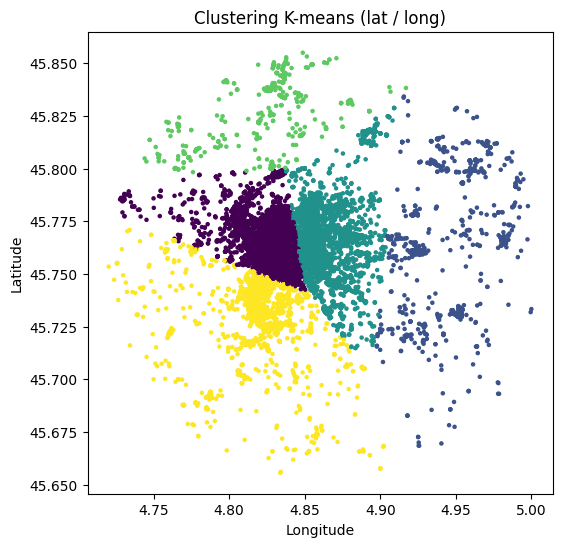

In [46]:


# 3. K-means
kmeans = KMeans(n_clusters=5, random_state=42)
labels = kmeans.fit_predict(X_scaled)

# 4. Ajout des labels au DataFrame
data_cleaned["cluster"] = labels

# 5. Visualisation
plt.figure(figsize=(6,6))
plt.scatter(
    data_cleaned["long"],
    data_cleaned["lat"],
    c=data_cleaned["cluster"],
    s=5
)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Clustering K-means (lat / long)")
plt.show()


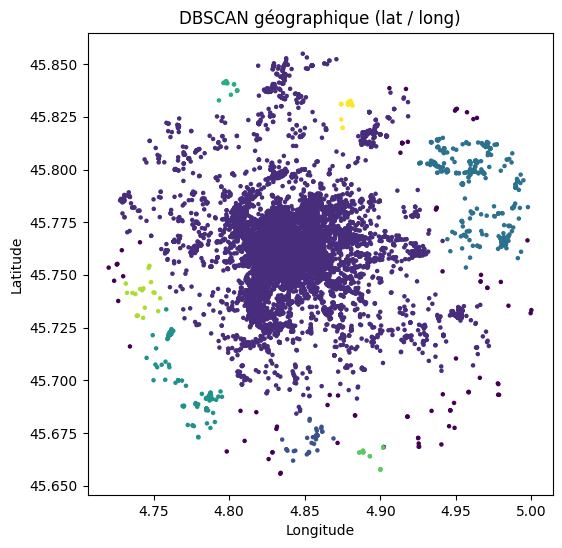

In [45]:
import numpy as np

# Sélection des coordonnées
X = data_cleaned[["lat", "long"]]

from sklearn.cluster import DBSCAN

dbscan = DBSCAN(
    eps=0.01,      # 500 mètres
    min_samples=10,
)

labels = dbscan.fit_predict(X)

# Ajouter les clusters au DataFrame
data_cleaned["cluster"] = labels


import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
plt.scatter(
    data_cleaned["long"],
    data_cleaned["lat"],
    c=data_cleaned["cluster"],
    s=5
)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("DBSCAN géographique (lat / long)")
plt.show()


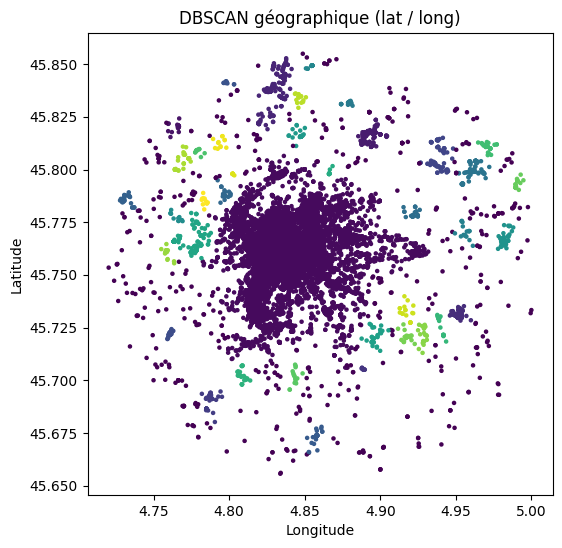

In [49]:
# Sélection des coordonnées
X = data_cleaned[["lat", "long"]]

from sklearn.cluster import DBSCAN

dbscan = DBSCAN(
    eps=0.005,      # 500 mètres
    min_samples=10,
)

labels = dbscan.fit_predict(X)

# Ajouter les clusters au DataFrame
data_cleaned["cluster"] = labels


import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
plt.scatter(
    data_cleaned["long"],
    data_cleaned["lat"],
    c=data_cleaned["cluster"],
    s=5
)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("DBSCAN géographique (lat / long)")
plt.show()
